In [1]:
import os
import docx2txt
import pandas as pd
# custom
from src.pdfPreprocessor import PdfDocument
from src.docPreprocessor import DocxDocument

In [2]:
from pathlib import Path

path = Path(Path.cwd())
par = str(path.parent)
saving_path = par + "/datafiles/master-table/"

In [3]:
task_list = []
corp_list = []
question_list = []

# docx (Word) file 처리

In [4]:
# docx 파일 처리
data_path = par + "/datafiles/raw-data/"

for datadir in os.listdir(data_path):
    if datadir[0] == '.' or datadir[-3:] == 'dom':
        continue
        
    cnt = 0
    
    for file in os.listdir(data_path + datadir):
        cnt += 1
        ext = file[-3:]
        if ext == 'ocx':
            text = docx2txt.process(data_path + datadir + "/" + file)
            lines = []
            for line in text.splitlines():
                if line == '\n' or line == '':
                    continue
                lines.append(line)
            dd = DocxDocument(lines)
            corpName = dd.extractCorpName()
            task = dd.extractTask()
            q, a = dd.extractQAList()

            task_list.append(task)
            corp_list.append(corpName)
            question_list.append(q)
        
    print("디렉터리 {}의 {}개 파일을 처리 완료.".format(datadir, cnt))


디렉터리 incruit2의 1412개 파일을 처리 완료.
디렉터리 incruit의 1887개 파일을 처리 완료.


In [5]:
len(task_list), len(corp_list), len(question_list)

(1433, 1433, 1433)

In [6]:
# question_list[:5]

# question_list 처리
qst_list = []
for q in question_list:
    if q is None:
        continue
    qst_list.extend(q)

In [7]:
len(qst_list)

4127

In [8]:
task_df = pd.DataFrame(task_list, columns=['name'])
corp_df = pd.DataFrame(corp_list, columns=['name'])
qst_df = pd.DataFrame(qst_list, columns=['name'])

In [9]:
task_df['length'] = task_df.name.map(len)
corp_df['length'] = corp_df.name.map(len)
qst_df['length'] = qst_df.name.map(len)

## 직무 처리

In [10]:
wrong_task_index = []

In [11]:
task_df.describe()

,length
count,1433.00000
mean,11.57083
std,35.11765
min,0.00000
25%,3.00000
50%,4.00000
75%,10.00000
max,563.00000


<AxesSubplot:>

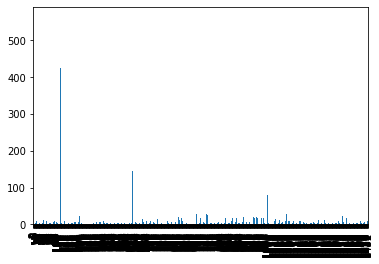

In [12]:
task_df.length.plot(kind='bar')

In [13]:
# 직무가 제대로 뽑히지 않은 경우 1 : 숫자.(공백) 으로 시작하는 경우
import re

reg = re.compile(r'^\d+\.\s')

task_df.loc[ task_df.name.map(lambda line: False if reg.match(line) is None else True) ]

,name,length
13,1. 성격의 장단점 및 대인관계,17
46,1. 평가역량 = 팀워크지향 ( 한글 1500자 이내 ),31
165,"1. 자신의 노력으로 성취한 결과물을 쓰고, 그 결과물을 얻기 위해 노력한 점을 서...",58
200,1. 여러분이 선택한 계열사와 해당 직무를 지원한 동기는 무엇인가요?① 선택한 계열...,156
221,1. 지원하게 된 동기 또는 해당 직무에 지원하게 된 동기는 무엇입니까? (300자...,50
303,1. 지원동기 및 열정에 대하여(799/800 Byte),31
345,1. 주요경력 / 업무강점 등,16
349,1. 지원동기 및 열정에 대하여(799/800 Byte),31
423,1. 창의적이며 도전을 두려워 하지 않는 인재입니다.,29
440,1. 성장과정,7


In [14]:
wrong_task_index.extend(list(task_df.loc[ task_df.name.map(lambda line: False if reg.match(line) is None else True) ].index))

In [15]:
temp = task_df.drop(wrong_task_index)

In [16]:
# 직무가 제대로 뽑히지 않은 경우 2 : 길이가 50을 초과
temp.loc[ temp.length > 50 ]

,name,length
8,"2010년, 가루푸딩을 사러 온 저에게, 머리 숙여 사과한 일본 대형마트 점장의 모...",146
28,"중학교 때, 아버지 친구분이 일하시는 고리원자력발전소에 간 적이 있습니다. 그 엄청...",242
45,"- 저는 홈플러스 물류센터, CU편의점에서 몇 개월 일하면서 ‘유통’이라는 것에 관...",563
48,01.여러분이 선택한 직무 및 CJ제일제당에 대한 지원동기는 무엇인가요? ① 선택한...,162
67,저는 2녀 중 맏딸로 자라서 그런지 책임감이 강한 편입니다. 어린 시절 부모님 두분...,560
117,요즘 시중에 판매되고 있는 믹스제품들이 많이 있습니다. 대부분의 믹스제품들은 전자레...,424
127,인생에서 가장 중요하게 생각하는 가치관이자 저를 대표하는 단어로써 저는 ‘강한 책임...,160
173,"고등학교 3학년 말, 진로를 결정하기 위해 고민하던 때에 저는 훗날 일반기업을 위해...",298
179,"‘사람이 미래다’ 사람 중심의 경영 즉, 직원을 인격체로 존중하고 인재양성을 최우선...",94
184,영어 강사셨던 아버지께서는 수업을 위해서 항상 공부를 하셨습니다. 그 모습을 보고 ...,94


In [17]:
temp = temp.loc[ temp.length < 50 ]
temp.describe()

,length
count,1385.000000
mean,7.189892
std,6.352544
min,0.000000
25%,3.000000
50%,4.000000
75%,9.000000
max,49.000000


In [18]:
temp.loc[ (30 <= task_df.length) & (task_df.length < 50) ].sort_values(by=['length'], ascending=False)

,name,length
326,"-지원분야와 관련하여 귀하가 가진 역량(지식,기술,열정,경력)에 대해 기술하여 주십시오.",49
264,"스스로를 계속 성장시켜 조직에서 인정받고, 나아가 사회에 기여하는 진정한 사회인이 되자",48
372,1.지원동기 및 본인이 지원직무에 적합하다고 생각하는 이유는 무엇입니까?(300자),46
25,054-335-3000 (代) Fax : 054-335-1311,36
149,<글로벌 통합보완 기업으로의 도약을 위한 안랩만의 경쟁력 형성>,35
215,<기존의 틀을 깨고 도전한 동아리 프로젝트 '어우렁 더우렁'>,34
79,"홍보를 ‘제대로’ 또 ‘즐겁게’ 배울 수 있는 곳, 프레인",32
262,1.현대건설 지원동기(본인이 경험하고 싶은 업무 중심),30
327,1.현대건설 지원동기(본인이 경험하고 싶은 업무 중심),30
462,1.현대건설 지원동기(본인이 경험하고 싶은 업무 중심),30


In [19]:
# 직무가 제대로 뽑히지 않은 경우 3 : 숫자. 으로 시작하는 경우
import re

reg = re.compile(r'^\d+\.')

temp = temp.loc[ ~(temp.name.map(lambda line: False if reg.match(line) is None else True)) ]

temp.loc[ (30 <= task_df.length) & (task_df.length < 50) ].sort_values(by=['length'], ascending=False)

,name,length
326,"-지원분야와 관련하여 귀하가 가진 역량(지식,기술,열정,경력)에 대해 기술하여 주십시오.",49
264,"스스로를 계속 성장시켜 조직에서 인정받고, 나아가 사회에 기여하는 진정한 사회인이 되자",48
25,054-335-3000 (代) Fax : 054-335-1311,36
149,<글로벌 통합보완 기업으로의 도약을 위한 안랩만의 경쟁력 형성>,35
215,<기존의 틀을 깨고 도전한 동아리 프로젝트 '어우렁 더우렁'>,34
79,"홍보를 ‘제대로’ 또 ‘즐겁게’ 배울 수 있는 곳, 프레인",32
608,Manufacturing process engineer,30
703,자기소개1 (지원동기/희망근무분야/입사후포부)(400),30
1345,Manufacturing process engineer,30


In [20]:
# 직무가 제대로 처리되지 않은 경우 4 : 길이 32 이상 & 길이 0
temp = temp.loc[ (temp.length > 0) & (temp.length <= 30) ]

temp.sort_values(by=['length'], ascending=False)

,name,length
703,자기소개1 (지원동기/희망근무분야/입사후포부)(400),30
608,Manufacturing process engineer,30
1345,Manufacturing process engineer,30
1394,Developing Financial Servoces,29
735,"Network operating, management",29
...,...,...
211,시공,2
208,회계,2
528,영업,2
1268,총무,2


In [21]:
temp.length.describe()

count    1372.000000
mean        6.988338
std         5.806371
min         2.000000
25%         3.000000
50%         4.000000
75%         9.000000
max        30.000000
Name: length, dtype: float64

In [22]:
temp.loc[ temp.length > 9 ].sort_values(by=['length'], ascending=False)

,name,length
1345,Manufacturing process engineer,30
608,Manufacturing process engineer,30
703,자기소개1 (지원동기/희망근무분야/입사후포부)(400),30
735,"Network operating, management",29
599,"Network operating, management",29
...,...,...
1143,Superviser,10
366,경영관리부 회계담당,10
641,플랜트부문 선체의장,10
760,Food Sales,10


In [23]:
temp.loc[ temp.length > 9 ].name.unique()

array(['<토목업 현장소장의 아들>', '생산기술, 품질관리', '꿈은 꿈을 몰고 온다.', '영화홍보마케팅 인턴',
       'Electricity', '언어교육센터 행정직', '[지금의 나를 만들어준 소중한자산]',
       '“성실함은 나를 성공으로 이끈다.”', '[열정으로 만들어낸 결실]', 'VIP고객 인바운드',
       '<달력 그리고 태극마크>', '성장배경(432 byte / 500 byte)', '글로벌 SPA 판매 전문가',
       '① 선택한 계열사가 아니면 안되는 이유', 'Developing financial servises',
       '개인금융 서비스직(텔러)', '“세계인과 소통하는 GG인이 되겠습니다”', '경영지원(인사/노무)',
       'Merchandising', '공정설계 및 HSE & 소방설계', '컨버전스 Sales',
       'Manufacturing', '<돈으로도 살 수 없는 경험, 유럽 무전여행>', '필드서비스 엔지니어',
       '[주변을 바라보는 기업]', '#. 어디에든 뿌리내리는 민들레처럼', 'SALES FOOD', '플랜트설계_전기설계',
       '자동차 엔지니어가 된다는 것]', '해외바이어 초청\xa0인턴', '[최선도 변명일 뿐 혼을 바쳐라]',
       '재경팀, 총무인사팀', '최소 300자 / 600자 제한', '경영관리부 회계담당',
       'Sales management', '[절대 배신하지 않는 것, 노력]', '인턴쉽 기계분야(기계/재료)',
       '수의약리독성학실험실', '<낮은 곳에서 바라보는 사람>', '- EBS를 이해하는 방송기술 지원',
       'Environment', 'Retail기획, 관리', '할 수 있다는 용기', '[꿈의 보온병 설계]',
       '낭비 자산 0%에 도전하다', 'Technology', 'Production control',
       'Sales planning', 

In [24]:
# 직무가 제대로 처리되지 않은 경우 5 : 자소서의 소제목
def remove(row):
    chars = ['(', '\"', '[', '<']
    if row[0] in chars:
        return False
    elif row[-1] in chars:
        return False
    return True

temp = temp.loc[ temp.name.map(remove) ].sort_values(by=['length'])
temp.loc[ temp.length > 15 ].name.unique()

array(['Commercial sales', 'price management', 'Customer service',
       'Sales management', 'Industry machine', 'Store Consultant',
       'Foreign Business', 'Power generation', 'Service planning',
       'System operating', 'CM/IM Technology', 'Customer Service',
       'Flight attendant', 'Oversea business', 'General planning',
       'Sales manegement', '자동차 엔지니어가 된다는 것]', 'Strategy planning',
       'Lifelong learning', '긍정적인 마인드와 여유로운 배려', 'Business planning',
       'Automatic control', 'Financial affairs', 'Computation clerk',
       '항공우주, R&D, 컴퓨터/전산', 'Business research', '공정설계 및 HSE & 소방설계',
       'Galaxy consultant', 'Medical Equipment', '최소 300자 / 600자 제한',
       'Production Control', 'General office job', 'Marketing planning',
       'Insurance business', 'Production control', 'Network management',
       'Information design', 'Other medical care', 'Service consultant',
       'Student management', 'Sales Distribution', 'Distribution sales',
       'General Office Jo

In [25]:
# 직무가 제대로 처리되지 않은 경우 6 : 길이가 15 초과인 데이터에 대해 하드 코딩
rmList = [
    "자동차 엔지니어가 된다는 것]", "긍정적인 마인드와 여유로운 배려",
    "최소 300자 / 600자 제한", "#. 어디에든 뿌리내리는 민들레처럼",
    '“성실함은 나를 성공으로 이끈다.”', "- EBS를 이해하는 방송기술 지원",
    "① 선택한 계열사가 아니면 안되는 이유", "성장배경(432 byte / 500 byte)",
    "사람들의 마음을 얻는 회계전문가가 되겠습니다!", "자기소개1 (지원동기/희망근무분야/입사후포부)(400)"
]

temp = temp.loc[ temp.name.map(lambda row: False if row in rmList else True) ]
temp.loc[ temp.length > 15 ].name.unique()

array(['Commercial sales', 'price management', 'Customer service',
       'Sales management', 'Industry machine', 'Store Consultant',
       'Foreign Business', 'Power generation', 'Service planning',
       'System operating', 'CM/IM Technology', 'Customer Service',
       'Flight attendant', 'Oversea business', 'General planning',
       'Sales manegement', 'Strategy planning', 'Lifelong learning',
       'Business planning', 'Automatic control', 'Financial affairs',
       'Computation clerk', '항공우주, R&D, 컴퓨터/전산', 'Business research',
       '공정설계 및 HSE & 소방설계', 'Galaxy consultant', 'Medical Equipment',
       'Production Control', 'General office job', 'Marketing planning',
       'Insurance business', 'Production control', 'Network management',
       'Information design', 'Other medical care', 'Service consultant',
       'Student management', 'Sales Distribution', 'Distribution sales',
       'General Office Job', 'Corporate business', 'Electric equipment',
       'Building exec

In [26]:
temp.loc[ temp.length <= 15 ].name.unique()

array(['교사', 'SC', '행원', '영업', '시공', '법학', '행정', '생산', '인턴', '회계', '인사',
       '상경', 'QA', '구매', '사무', '텔러', 'SE', '건축', '통계', '기계', 'MD', '기획',
       '경영', '화학', '6급', '보상', 'FM', '전산', '총무', 'IT', '품질', '전기', '개발',
       '일반', '재경', '설계', '비서', '안전', '기구', '물류', '홍보', '번역', '재무', '세무',
       '공무', 'FE', '제조', '환경', '판매', '송무', '사원', '연구', '전략', '기술', '기자',
       '여신', 'IB', '학술', '서빙', '플랜트', '간호사', '객실장', '레인져', '재경팀', '미표기',
       'SCM', '전산직', '기술직', '생산부', '사무직', '영업직', 'R&D', '건축직', '생산직',
       '시운전', '마케팅', '안정팀', '서비스', '은행원', '승무원', '기획실', '일반직', 'VMD',
       '요양직', '전산팀', 'DB2', '교육팀', '기능직', '설계직', '기관사', '제작팀', '포워딩',
       '약제팀', '교정직', '연구부', '송배전', '영업부', '인턴십', '품질팀', '영업팀', '상담직',
       '연구직', '무역부', '교직원', '홍보팀', '행정직', '관리부', '물류팀', '바이어', '전직군',
       '연구원', '매니저', '운영직', '바우처', '리셉션', '컨설팅', '제조팀', 'F&B', '경영지원',
       '기술영업', '생산관리', '업무지원', '물류영업', '항공제작', '건축시공', '방송기술', '인사관리',
       '주택금융', '자격인증', '일반사무', '자산운용', '영업관리', '품질경영', '지원동기', '기계분야',

In [27]:
# 직무가 제대로 처리되지 않은 경우 6 : 길이가 15 이하인 데이터에 대해 하드 코딩
rmList = [
    '낭비 자산 0%에 도전하다', '꿈은 꿈을 몰고 온다.', '할 수 있다는 용기',
    '합격 자기소개서', '*성장과정', '성장과정.'
]

temp = temp.loc[ temp.name.map(lambda row: False if row in rmList else True) ]
temp.describe()

,length
count,1338.000000
mean,6.784006
std,5.649086
min,2.000000
25%,3.000000
50%,4.000000
75%,8.000000
max,30.000000


In [28]:
# 직무 유니크값들 저장
names = list(temp.name.unique())
print(names[:5])

df = pd.DataFrame(names, columns=['name'])
df.to_csv(saving_path+"tasks.csv", index=False, encoding='utf-8-sig')
print(df.head())

['교사', 'SC', '행원', '영업', '시공']
  name
0   교사
1   SC
2   행원
3   영업
4   시공


In [29]:
# 저장 파일 확인 
pd.read_csv(saving_path + "tasks.csv").head()

,name
0,교사
1,SC
2,행원
3,영업
4,시공


## 기업명 처리

In [30]:
corp_df.describe()

,length
count,1433.000000
mean,10.868807
std,9.898272
min,2.000000
25%,5.000000
50%,10.000000
75%,14.000000
max,162.000000


In [31]:
# 기업 처리 1 : 길이가 50 이상인 데이터 삭제
corp_df.loc[ corp_df.length >= 50 ]

,name,length
23,"1. 가장 심혈을 기울여 목표를 성취한 경험이 있다면 구체적인 동기, 행동, 결과 ...",59
25,우) 770-150 경상북도 영천시 본촌공단길 39 (본촌동) ...,58
28,지원하는 회사와 분야(직무)에 대한 지원동기를 자유롭게 기술 하세요.(50자 이상 ...,54
149,* 2014 AhnLab 신입인턴 공개채용에 지원하게 된 동기를 간략하게 작성해주시...,52
179,지원하는 회사와 분야(직무)에 대한 지원동기를 자유롭게 기술 하세요.(50자 이상 ...,58
233,자신이 가장 ‘재미있게’ 몰입했던 일과 그 경험에 관해 기술해주세요. <최소30자/...,55
248,"1. 가장 심혈을 기울여 목표를 성취한 경험이 있다면 구체적인 동기, 행동, 결과 ...",60
289,1. 현대하이스코에 지원하게 된 동기와 입사를 위해 본인이 준비한 내용/노력들을 경...,79
293,1. 희망직무를 기재하시고 그 이유와 본인의 적합성에 대해 세 가지(전공 및 기타의...,82
300,"1. 자신의 경험 중 가장 도전적이었던 일은 무엇이며, 극복하기 위해 했던 행동, ...",66


In [32]:
corpTemp = corp_df.loc[ corp_df.length < 50 ]
corpTemp.describe()

,length
count,1413.000000
mean,9.956122
std,5.318688
min,2.000000
25%,5.000000
50%,10.000000
75%,14.000000
max,45.000000


<AxesSubplot:>

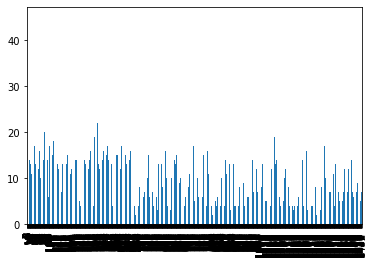

In [33]:
corpTemp.length.plot(kind='bar')

In [34]:
# 기업 처리 2 : 합격 자기소개서가 들어있는 행들만 남김 (뒤에 합격 자기소개서는 제거)
corpTemp.loc[ corpTemp.length >= 25 ]

,name,length
3,Financial Company 합격 자기소개서,26
33,콘티넨탈 오토모티브 일렉트로닉스 합격 자기소개서,26
45,1. 지원동기 및 열정에 대하여.(800byte),27
92,* 성장 과정 또는 학창시절에 대해서 서술해 주십시오.,30
119,NHN Entertainment 합격 자기소개서,26
139,1. 여러분이 선택한 계열사 및 직무에 대한 지원동기는 무엇인가요? (1000),44
184,1. 자신의 성장과정에 대해 서술하여 주십시오.(100자),32
295,자신의 성장과정을 기술해 주시기 바랍니다. (400자 내외),33
321,우정유빅스엔지니어링종합건축사사무소 합격 자기소개서,27
323,<지원 목적/성공적으로 할 수 있는 이유와 사례>,27


In [35]:
corpTemp.loc[ corpTemp.name.map(lambda row: row[-8:] == '합격 자기소개서') ]

,name,length
0,기아자동차 합격 자기소개서,14
1,에이스원격평생교육원 합격 자기소개서,19
2,대림산업 합격 자기소개서,13
3,Financial Company 합격 자기소개서,26
5,KG이니시스 합격 자기소개서,15
...,...,...
1390,삼성SDS 합격 자기소개서,14
1391,LG유플러스 합격 자기소개서,15
1396,대교 소빅스 합격 자기소개서,15
1423,라파스 합격 자기소개서,12


In [36]:
def change(row):
    if row[-8:] == '합격 자기소개서':
        return row[:-8].strip()
    return row.strip()

corpTemp.loc[:, 'name'] = corpTemp.name.apply(change)  # corpTemp.loc[:, 'name']
corpTemp.loc[:, 'length'] = corpTemp.name.map(len)

/Users/nahyeonan/.local/lib/python3.7/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [37]:
# 기업 처리 3 : 자기소개서 가 들어있는 행 처리
corpTemp.describe()

,length
count,1413.000000
mean,6.562633
std,4.023453
min,2.000000
25%,4.000000
50%,6.000000
75%,8.000000
max,44.000000


In [38]:
def change(row):
    if row[-5:] == '자기소개서':
        return row[:-5].strip()
    return row.strip()

corpTemp.loc[:, 'name'] = corpTemp.name.apply(change)  # corpTemp.loc[:, 'name']
corpTemp.loc[:, 'length'] = corpTemp.name.map(len)

/Users/nahyeonan/.local/lib/python3.7/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [39]:
corpTemp = corpTemp.loc[ corpTemp.length != 0 ]
corpTemp.describe()

,length
count,1398.000000
mean,5.841202
std,3.692042
min,2.000000
25%,4.000000
50%,5.000000
75%,7.000000
max,44.000000


In [40]:
# 기업 처리 4 : 숫자. 에 매칭되는 경우
import re

reg = re.compile(r'^\d+\.')

corpTemp = corpTemp.loc[ corpTemp.name.map(lambda row: False if reg.match(row) else True) ]

corpTemp.sort_values(by=['length'], ascending=False)

,name,length
766,포스코 지원동기와 지원분야를 선택하게 된 이유를 작성하여 주십시오.(600),42
703,포스코 자기소개서 작성은 포스코 홈페이지상에서 직접 입력하셔야 합니다.,39
295,자신의 성장과정을 기술해 주시기 바랍니다. (400자 내외),33
92,* 성장 과정 또는 학창시절에 대해서 서술해 주십시오.,30
323,<지원 목적/성공적으로 할 수 있는 이유와 사례>,27
...,...,...
1188,넥슨,2
278,효성,2
513,동원,2
519,E1,2


In [41]:
# 기업 처리 5 : 길이 20 이상 => 버림
corpTemp.loc[ corpTemp.length >= 20 ]

,name,length
92,* 성장 과정 또는 학창시절에 대해서 서술해 주십시오.,30
215,"성장과정/생활신조 0자 / 1,500자",21
295,자신의 성장과정을 기술해 주시기 바랍니다. (400자 내외),33
323,<지원 목적/성공적으로 할 수 있는 이유와 사례>,27
424,본인의 장단점 및 전문성 등 자유롭게,20
468,< 타인과 구별되는 나만의 강점 3가지 >,23
703,포스코 자기소개서 작성은 포스코 홈페이지상에서 직접 입력하셔야 합니다.,39
764,사람들의 마음을 얻는 회계전문가가 되겠습니다!,25
766,포스코 지원동기와 지원분야를 선택하게 된 이유를 작성하여 주십시오.(600),42


In [42]:
corpTemp = corpTemp.loc[ corpTemp.length < 20 ]

corpTemp.sort_values(by=['length'], ascending=False)

,name,length
502,본인이 가진 열정과 역량에 대하여,18
321,우정유빅스엔지니어링종합건축사사무소,18
810,NHN Entertainment,17
33,콘티넨탈 오토모티브 일렉트로닉스,17
3,Financial Company,17
...,...,...
881,샘표,2
610,한샘,2
40,DK,2
1054,농협,2


In [43]:
# 기업 처리 6 : 지원동기, 열정, 역량 가 포함된 행 제거
corpTemp.loc[ corpTemp.length >= 15 ]

,name,length
3,Financial Company,17
33,콘티넨탈 오토모티브 일렉트로닉스,17
61,MG새마을금고 직원공개경쟁채용,16
119,NHN Entertainment,17
263,국민건강보험공단 합격 자소서,15
301,1지망: 플랜트사업_전기시공,15
321,우정유빅스엔지니어링종합건축사사무소,18
502,본인이 가진 열정과 역량에 대하여,18
603,MG새마을금고 직원공개경쟁채용,16
810,NHN Entertainment,17


In [44]:
corpTemp.loc[ (corpTemp.length < 15) & (corpTemp.length > 10) ]

,name,length
8,지원동기 및 열정에 대하여,14
48,직무 : 공무환경 토목,12
77,한국지능형교통체계협회,11
91,연세대학교 원주캠퍼스,11
121,한국보건복지정보개발원,11
127,책임감은 모든 일의 기본,13
173,지원동기 (300자 이내),14
375,대전광역시 시설관리공단,12
425,지원동기 및 열정에 대하여,14
456,비티엘 메디컬 테크놀로지,13


In [45]:
rmList = ['지원동기', '열정', '역량', '직무', '1지망', '성장과정', '이  력  서']
def remove(row):
    for e in rmList:
        if e in row:
            return False
    return True

corpTemp = corpTemp.loc[ corpTemp.name.map(remove) ]

In [46]:
corpNames = list(corpTemp.name.unique())
df = pd.DataFrame(corpNames, columns=['name'])
df.to_csv(saving_path+"companies.csv", index=False, encoding='utf-8-sig')

In [47]:
pd.read_csv(saving_path+"companies.csv")

,name
0,기아자동차
1,에이스원격평생교육원
2,대림산업
3,Financial Company
4,SH공사
...,...
808,NH농협은행
809,기업은행(IBK)
810,KB손해사정
811,삼성 Display


## 질문 처리

In [48]:
qst_df.describe()

,length
count,4127.000000
mean,50.999031
std,46.268636
min,3.000000
25%,18.000000
50%,44.000000
75%,69.000000
max,864.000000


In [49]:
qst_df.sort_values(by=['length'])

,name,length
1887,6.,3
1885,4.,3
1886,5.,3
2184,2. 성격,5
27,1. 장점,5
...,...,...
1017,1. 고등학교 때 과학부라는 동아리를 했습니다. 동아리는 물리과학부여서 물리에 관련...,452
12,1. 고등학교 때 과학부라는 동아리를 했습니다. 동아리는 물리과학부여서 물리에 관련...,452
5,2. 해외여행을 가기 위해 많은 노력들을 했습니다. 우선 장기간으로 두 달의 기간 ...,548
1010,2. 해외여행을 가기 위해 많은 노력들을 했습니다. 우선 장기간으로 두 달의 기간 ...,548


In [50]:
# 질문 처리 1 : 앞의 숫자. 제거하고 양끝 공백 제거
qst_df['name'] = qst_df.name.map(lambda row: row[2:].strip())
qst_df['length'] = qst_df.name.map(len)

In [51]:
qst_df.sort_values(by=['length'])

,name,length
1885,,0
1886,,0
1887,,0
2470,성격,2
3908,목표,2
...,...,...
1017,고등학교 때 과학부라는 동아리를 했습니다. 동아리는 물리과학부여서 물리에 관련된 실...,449
12,고등학교 때 과학부라는 동아리를 했습니다. 동아리는 물리과학부여서 물리에 관련된 실...,449
5,해외여행을 가기 위해 많은 노력들을 했습니다. 우선 장기간으로 두 달의 기간 동안 ...,544
1010,해외여행을 가기 위해 많은 노력들을 했습니다. 우선 장기간으로 두 달의 기간 동안 ...,544


In [52]:
qst_df = qst_df.loc[ qst_df.length > 0 ]

In [53]:
qst_df.sort_values(by=['length'], ascending=False)

,name,length
3380,"월성원자력본부 가압중수로 한글 매뉴얼 번역 아르바이트를 하며, 발전, 변전계통 현장...",861
5,해외여행을 가기 위해 많은 노력들을 했습니다. 우선 장기간으로 두 달의 기간 동안 ...,544
1010,해외여행을 가기 위해 많은 노력들을 했습니다. 우선 장기간으로 두 달의 기간 동안 ...,544
1017,고등학교 때 과학부라는 동아리를 했습니다. 동아리는 물리과학부여서 물리에 관련된 실...,449
12,고등학교 때 과학부라는 동아리를 했습니다. 동아리는 물리과학부여서 물리에 관련된 실...,449
...,...,...
715,계기,2
1196,성격,2
2184,성격,2
1660,기타,2


In [54]:
qst_df.describe()

,length
count,4124.000000
mean,47.706838
std,46.244147
min,2.000000
25%,14.000000
50%,40.000000
75%,66.000000
max,861.000000


<AxesSubplot:>

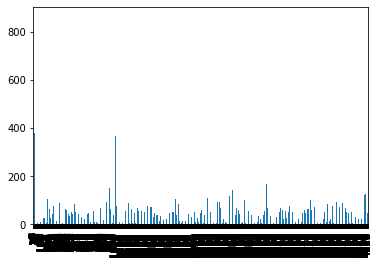

In [55]:
qst_df.length.plot(kind='bar')

In [56]:
qst_df.loc[ qst_df.length >= 300 ]

,name,length
0,저의 개인적 희망이란 SH공사의 비전인 시민이 행복하고 지속 발전하는 희망기업이 되...,381
2,이러한 저의 작은 행동으로 시간을 낭비하지 않고 실험에 몰두하고 집중을 할 수 있었...,305
5,해외여행을 가기 위해 많은 노력들을 했습니다. 우선 장기간으로 두 달의 기간 동안 ...,544
8,저는 군복무를 지하철공익요원으로 했습니다. 그 당시 열심히 공익요원으로써 사람들에게...,414
10,이 사건으로 얻을 수 있는 교훈은 언제나 긴장하며 한순간의 방심과 의사결정에 따라서...,368
12,고등학교 때 과학부라는 동아리를 했습니다. 동아리는 물리과학부여서 물리에 관련된 실...,449
13,이러한 노력으로 우리 물리과학부는 생물학분야도 하는 통합적인 과학부가 되었고 나중에...,333
16,대학시절에 해외여행을 준비하기 위해 노래방에서 일을 했습니다. 대전지역이라 시급이 ...,340
17,결론적으로 저는 4개월이라는 시간동안 단 한 번도 지각이나 결석을 하지 않았으며 오...,378
1005,저의 개인적 희망이란 SH공사의 비전인 시민이 행복하고 지속 발전하는 희망기업이 되...,381


In [57]:
# 질문 처리 2 : 3003 제외한 길이 300 이상의 행들은 삭제
idx = qst_df.loc[3003, 'name'].find('(')
qst_df.loc[3003, 'name'] = qst_df.loc[3003, 'name'][:idx].strip()
qst_df.loc[3003, 'length'] = len(qst_df.loc[3003, 'name'])

qst_df = qst_df.loc[ qst_df.length < 300 ]

qst_df.describe()

,length
count,4105.000000
mean,45.938124
std,37.812919
min,2.000000
25%,14.000000
50%,40.000000
75%,65.000000
max,276.000000


In [58]:
# 질문 처리 3 : 길이 250보다 큰 것 버리기
qst_df.loc[ qst_df.length >= 200 ].sort_values(by=['length'], ascending=False)

,name,length
3981,의사소통을 통해 팀의 역량을 끌어내는 능력이 있습니다. 저는 화공기사 스터디를 할 ...,276
3156,"글로벌 감각의 소유자: 국제관계학을 전공하며 쌓은 전공 지식에 더해, 저는 매일 국...",267
1757,몇 달간 비용처리 기준을 정하고 물품을 추려내니 버려졌던 기회비용이 30만 원 이상...,266
1014,결과적으로는 가열된 가스터빈이 열을 받아서 연기가 발생하였고 큰 위험적인 일은 발생...,252
9,결과적으로는 가열된 가스터빈이 열을 받아서 연기가 발생하였고 큰 위험적인 일은 발생...,252
1794,(NCS 경험 및 경력기술서) 지원 분야와 관련된 업무경력 및 실적 등 경력사항이나...,250
2458,(NCS 경험 및 경력기술서) 지원 분야와 관련된 업무경력 및 실적 등 경력사항이나...,250
2563,(NCS 경험 및 경력기술서)지원 분야와 관련된 업무경력 및 실적 등 경력사항이나 ...,249
2509,당신은 업무능력을 인정받고 팀원들로부터 신뢰를 받는 사원 3년차 입니다. 만약 당신...,246
1025,삶을 통해 이루고 싶은 인생의 비전 또는 목표 3가지를 우선순위 순으로 적어 주십시...,236


In [59]:
qst_df = qst_df.loc[ qst_df.length <= 250 ]

qst_df.describe()

,length
count,4100.000000
mean,45.673902
std,37.069181
min,2.000000
25%,14.000000
50%,40.000000
75%,65.000000
max,250.000000


In [60]:
# 질문 처리 4 : 지원동기가 들어간 질문들 => 모두 지원동기로 변환

def change(row):
    if '지원동기' in row or '지원 동기' in row:
        return '지원동기'
    elif '성장과정' in row or '성장 과정' in row:
        return '성장과정'
    elif '도전' in row:
        return '도전'
    elif '사회활동' in row or '사회 활동' in row:
        return '사회활동'
    elif '자기소개' in row or '자기 소개' in row:
        return '자기소개'
    elif '포부' in row:
        return '포부'
    return row.strip()

qst_df['name'] = qst_df.name.apply(change)
qst_df['length'] = qst_df.name.map(len)

In [61]:
qst_df.describe()

,length
count,4100.000000
mean,39.103171
std,38.658138
min,2.000000
25%,4.000000
50%,31.000000
75%,61.000000
max,250.000000


In [62]:
qst_df.loc[ qst_df.length >= 200 ]

,name,length
556,아래 열거된 역량은 DSME에서 필요한 역량입니다. 본인이 보유한 역량 중 가장 근...,201
1025,삶을 통해 이루고 싶은 인생의 비전 또는 목표 3가지를 우선순위 순으로 적어 주십시...,236
1576,[공단인재] 공단에서 지속 필요로 하는 인재는 크게 ‘미래사업 추진형’ 인재와 ‘조...,232
1625,아래 열거된 역량은 DSME에서 필요한 역량입니다. 본인이 보유한 역량 중 가장 근...,201
1749,"곧 성인이 되고 다시 재정 상황이 나아지자 학업에 전념했고, 대학에서 위의 주제를 ...",218
1753,제 이름 00은 ‘얼굴이 밝다’라는 의미를 품고 있습니다. 솔직한 기분과 별개로 잘...,208
1794,(NCS 경험 및 경력기술서) 지원 분야와 관련된 업무경력 및 실적 등 경력사항이나...,250
2061,지원 분야와 관련된 업무 경력 및 실적 등 경력사항이나 기타 경험 및 활동에 대하여...,222
2458,(NCS 경험 및 경력기술서) 지원 분야와 관련된 업무경력 및 실적 등 경력사항이나...,250
2509,당신은 업무능력을 인정받고 팀원들로부터 신뢰를 받는 사원 3년차 입니다. 만약 당신...,246


In [63]:
# 질문 처리 5 : 길이 200 이상에서 하드코딩
rmIndex = [3129, 1753, 1749]
qst_df.drop(rmIndex, inplace=True)

In [76]:
# 길이 10 미만에서는 문제 없음
# qst_df.loc[ (qst_df.length < 10) ].name.unique()

# 길이 15 ~ 19 => 하드코딩
# for idx, row in qst_df.loc[ (qst_df.length < 20) & (qst_df.length >= 15) ].sort_values(by=['length']).iterrows():
#     print(idx, row['name'], row['length'])
    
qst_df.drop([3513, 377, 284, 1266, 873, 3263, 421, 2272, 4014, 375, 290, 4083, 2567, 2566],\
           inplace=True)


In [82]:
# 질문 처리 6 : 150 이상에서 이상한 부분
len(qst_df.loc[ qst_df.length >= 150 ].name.unique())

46

In [86]:
# for idx, row in qst_df.loc[ qst_df.length >= 150 ].sort_values(by=['length']).iterrows():
#     print(idx, row['name'])
    
qst_df.drop([754, 517, 2765, 3379, 753, 1006, 3155], inplace=True)
    

In [89]:
# 질문 처리 7 : 125 이상에서 이상한 부분
len(qst_df.loc[ qst_df.length >= 125 ].name.unique())

92

In [94]:
# name 속성에서 중복값은 제거하고 남김 (남기는 행은 첫번째)
qst_df = qst_df.drop_duplicates(['name'], keep='first')
qst_df.describe()

,length
count,2290.000000
mean,53.610480
std,35.200571
min,2.000000
25%,28.000000
50%,50.000000
75%,72.000000
max,250.000000


In [100]:
qst_df.drop([515, 14, 704, 3757, 1756, 4, 1180, 1], inplace=True)

In [102]:
# for idx, row in qst_df.loc[ qst_df.length >= 125 ].sort_values(by=['length']).iterrows():
#     print(idx, row['name'])

len(qst_df.loc[ (qst_df.length >= 100) & (qst_df.length < 125) ] )

114

In [104]:
# for idx, row in qst_df.loc[ (qst_df.length >= 100) & (qst_df.length < 125) ].sort_values(by=['length']).iterrows():
#     print(idx, row['name'])
    
qst_df.drop([705, 1806, 3153, 1754, 2980, 18, 741, 179, 2976, 2977], inplace=True)

In [108]:
# for idx, row in qst_df.loc[ (qst_df.length >= 90) & (qst_df.length < 100) ].iterrows():
#     print(idx, row['name'])
    
qst_df.drop([6, 78, 353, 405, 699, 700, 703 , 740, 755, 958, 1808], inplace=True)


6 태권도를 너무 좋아해서 결국에는 4단까지 취득을 하였고, 대학시절에 모의주식으로 1등을 하였고, 나이키마라톤을 한시간만에 완주를 하였고, 언제나 개근상을 탔습니다.
78 식품산업과 삼립식품의 상품에 대한 정확한 이해를 바탕으로 고객을 이해하고 그 고객에게 남들과 다른 경험을 전달할 수 있는 지식과 능력을 갖춘 인재를 발굴 하겠습니다.
101 본인이 참여한 다양한 조직(학교, 동아리, 직장 등)중에서 기억에 남는 경험을 선택하고 그 조직 내에서 본인의 역할은 무엇이었으며, 조직을 위해 본인이 기여한 바는 무엇입니까?
173 귀하가 회사를 선택하는 기준은 무엇이며 왜 당사가 그 기준에 적합한지를 작성하고, 당사에 입사하여 이루고 싶은 목표(직무 관련)에 대해 작성해주세요.(700자 이내)
274 예상치 못했던 문제로 인해 계획대로 일이 진행되지 않았을 때 책임감을 가지고 적극적으로 끝까지 업무를 수행해내어 성공적으로 마무리했던 경험이 있으면 기술해 주십시오.
325 지금까지 살아오며 가장 성취감을 느낄 수 있었던 일은 무엇이었습니까? 그 일을 시작하게 된 동기와 달성을 위해 어떤 노력을 했었는지에 대해 기술해주시기 바랍니다.
329 교내활동 중 자신이 속했던 조직(동아리, 학급 등)의 운영 방식의 장점과 단점은 무엇이었으며 단점을 보완하기 위해 노력했던 경험에 대해 구체적으로 기술해주십시오.(500자 이내)
330 학업 및 교내 활동 수행 중 자신에게 주어진 시간, 정보, 인력 등을 체계적으로 관리하고 활용하여 훌륭한 결과를 이뤄냈던 경험에 대해 구체적으로 기술해 주십시오.(500자 이내)
334 우리은행 영업점과 다른 시중은행 영업점을 직접 방문하시고, 우리은행이 상대적으로 우수한 점과 개선해야 할 점을 비교 설명하여 주세요. [800 자 / 1600 Bytes 이내]
353 입사 ~5년 : 여러 가지 공정들의 장·단점을 파악하겠습니다. 또한, 현장에서 겪는 불편함과 희망 사항에도 귀를 기울이는 자세로 공정가동의 최적화를 위해 최선을 다하겠습니다.
405 글

In [111]:
f = open('incruit_question.txt', 'wt')

for idx, row in qst_df.loc[ (qst_df.length < 90) & (qst_df.length >= 20) ].iterrows():
    f.write(str(idx) + "\t" + row['name'] + "\n")

f.close()

In [114]:
qst_df.name.to_csv(saving_path+"questions.csv", index=False, encoding='utf-8-sig')

In [115]:
pd.read_csv(saving_path+"questions.csv")

,name
0,귀하가 현저하게 높은 목표를 설정하고 이를 성공적으로 완수하여 본인 만족 또는 주변...
1,귀하의 상황판단(또는 의사결정)으로 인해 본인 또는 주변에 긍정적(또는 부정적) 결...
2,"귀하가 남다른 생각이나 발상을 통해 긍정적 결과를 만들어냈던 경험, 또는 조직이나 ..."
3,성실하다는 점을 객관적으로 인정할 수 있는 사례나 증거를 적어주십시오. 2000By...
4,당신을 있는 그대로 알고 싶습니다. 본인의 PR을 부탁 드립니다. (500자)
...,...
2256,여러분이 선택한 계열사와 해당 직무를 지원한 동기는 무엇인가요? 1. 선택한 계열사...
2257,"대학생활 중, 어려움을 극복했던 경험을 구체적으로 작성해 주세요. 1. 상황에 대한..."
2258,직무수행과 관련된 자신의 장점
2259,직무수행과 관련된 자신의 단점


<hr>

# dom 파일 처리

In [178]:
task_list = []
corp_list = []
qst_list = []

In [179]:
# dom 파일 처리
from bs4 import BeautifulSoup
import re

data_path = par + "/datafiles/raw-data/incruit-dom/"
reg = re.compile(r'^\d+\.')

for file in os.listdir(data_path):
    f = open(data_path + file, 'rt')
    
    soup = BeautifulSoup(f.read())
    
    f.close()
    
#     print(soup.select('title')[0].text[:-15]) # corp
    corp_list.append(soup.select('title')[0].text[:-15])
    
    if len(soup.select('#detail_info > span.cont > div > p')) > 1:
#         print(soup.select('#detail_info > span.cont > div > p')[1].text[4:].strip()) # task
        task_list.append(soup.select('#detail_info > span.cont > div > p')[1].text[4:].strip())
#     else:
#         print("exception")

    # question
    for line in soup.select('#detail_info > span.cont > p > strong'):
        question = line
        if line.text.startswith('Q'):
            question = line.text[3:].strip()
        else:
            question = line.text.strip()
            
        if question == '' or question == ' ':
            continue
            
        if reg.match(question) is not None:
            question = question[3:].strip()
            
        qst_list.append(question)

In [180]:
len(corp_list), len(task_list), len(qst_list)

(255, 240, 1147)

In [182]:
corpDf = pd.DataFrame(corp_list, columns=['name'])
corpDf = corpDf.drop_duplicates(['name'], keep='first')
corpDf

,name
0,삼성엔지니어링(주)
1,서울교통공사
2,LS전선(주)
3,코레일테크(주)
4,공무원연금공단
...,...
250,한국남동발전(주)
251,한화종합화학(주)
252,(주)빙그레
253,(주)웹젠


In [185]:
taskDf = pd.DataFrame(task_list, columns=['name'])
taskDf['name'] = taskDf.name.map(lambda row: row[1:].strip() if row.startswith(':') else row)
taskDf = taskDf.drop_duplicates(['name'], keep='first')
taskDf

,name
0,경영지원 - 재무
1,행정
2,신입/경력 통합6급
3,사무
4,금융영업
...,...
227,Product packing
233,일반관리
235,행정관리
238,Personnel management


In [186]:
qstDf = pd.DataFrame(qst_list, columns=['name'])
qstDf = qstDf.drop_duplicates(['name'], keep='first')
qstDf

,name
0,취미/특기 (40자)
1,존경인물 (10자)
2,존경이유 (40자)
3,삼성엔지니어링을 지원한 이유와 입사 후 회사에서 이루고 싶은 꿈을 기술하십시오. (...
4,"본인의 성장과정을 간략히 기술하되 현재의 자신에게 가장 큰 영향을 끼친 사건, 인물..."
...,...
1137,사회경험을 하면서 성취감을 얻었던 경험
1138,재학 또는 재직기간 동안 가장 뛰어난 업적은 무엇입니까? 그리고 왜 그렇게 생각하는...
1139,웹젠에 입사 지원한 동기는 무엇입니까
1140,이 밖의 자기소개를 하고 싶은 말


In [187]:
corpDf.to_csv(saving_path+"dom_companies.csv", index=False, encoding='utf-8-sig')
taskDf.to_csv(saving_path+"dom_tasks.csv", index=False, encoding='utf-8-sig')
qstDf.to_csv(saving_path+"dom_questions.csv", index=False, encoding='utf-8-sig')

In [188]:
# 확인
pd.read_csv(saving_path+"dom_companies.csv")

,name
0,삼성엔지니어링(주)
1,서울교통공사
2,LS전선(주)
3,코레일테크(주)
4,공무원연금공단
...,...
195,한국남동발전(주)
196,한화종합화학(주)
197,(주)빙그레
198,(주)웹젠


In [189]:
pd.read_csv(saving_path+"dom_tasks.csv")

,name
0,경영지원 - 재무
1,행정
2,신입/경력 통합6급
3,사무
4,금융영업
...,...
148,Product packing
149,일반관리
150,행정관리
151,Personnel management


In [190]:
pd.read_csv(saving_path+"dom_questions.csv")

,name
0,취미/특기 (40자)
1,존경인물 (10자)
2,존경이유 (40자)
3,삼성엔지니어링을 지원한 이유와 입사 후 회사에서 이루고 싶은 꿈을 기술하십시오. (...
4,"본인의 성장과정을 간략히 기술하되 현재의 자신에게 가장 큰 영향을 끼친 사건, 인물..."
...,...
1065,사회경험을 하면서 성취감을 얻었던 경험
1066,재학 또는 재직기간 동안 가장 뛰어난 업적은 무엇입니까? 그리고 왜 그렇게 생각하는...
1067,웹젠에 입사 지원한 동기는 무엇입니까
1068,이 밖의 자기소개를 하고 싶은 말
